<a href="https://colab.research.google.com/github/jarminett/Statistical_Learning_II/blob/main/Practica01/Practica01_0710082.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**UNIVERSIDAD GALILEO** \\
Instituto de Investigación de Operaciones \\
Posgrado en Análisis y Predicción de Datos \\
Luis Florian, 0710082, sección U \\

**Practica 1**



Los objetivos de esta práctica son los siguientes:

Utilizar estos datos de edad y estatura para implementar :

*   Hard-clustering con k-means (no usar sklearn)
*   Soft-clustering con GMM usando sklearn        
        

Ejecutar al menos 5 experimentos para seleccionar el valor de “K”

*   Ambos métodos pueden usar el mismo valor de “K”
*   Analizar el centroide de cada cluster y determinar si es posible asignar una categoría cada cluster

Analizar y concluir si el método del codo es adecuado para este problema

Usar los datos de prueba y estimar:

*   El cluster que k-means asigna cada uno.
*   La probabilidad de pertenecer a cada cluster según GMM        
        

Usar GMM y simular 1000 observaciones para estimar(estimación de Monte Carlo) el valor esperado(promedio) de la función f :

*   f(edad, estatura) = estatura /edad


### **Importing libraries**

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from scipy.spatial import distance


### **Loading Data**

In [5]:
df = pd.read_csv("/content/data/normales.csv", names=["Estatura","Edad"], header=0)
df.head(10)

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32
5,1.66,29
6,1.64,27
7,1.85,34
8,1.85,26
9,1.75,21


### **Data Visualization**

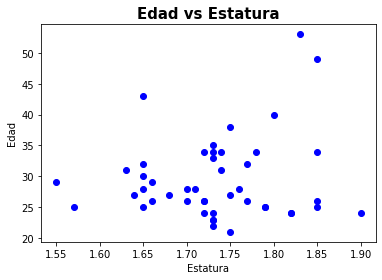

In [6]:
font = {'family': 'DejaVu Sans',
        'color':  'black',
        'weight': 'bold',
        'size': 15,
        }
plt.scatter(df["Estatura"],df["Edad"],c="blue")
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("Edad vs Estatura",fontdict=font)
plt.show()

In [7]:
df.describe()

,Estatura,Edad
count,46.000000,46.000000
mean,1.732609,29.521739
std,0.075349,6.708996
min,1.550000,21.000000
25%,1.685000,25.000000
50%,1.730000,27.500000
75%,1.777500,32.750000
max,1.900000,53.000000


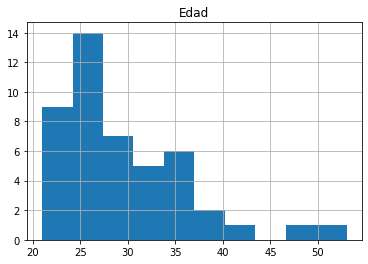

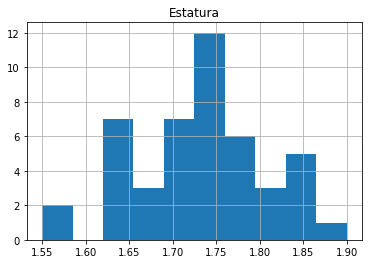

In [8]:
df.drop(['Estatura'],1).hist()
plt.show()
	
df.drop(['Edad'],1).hist()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


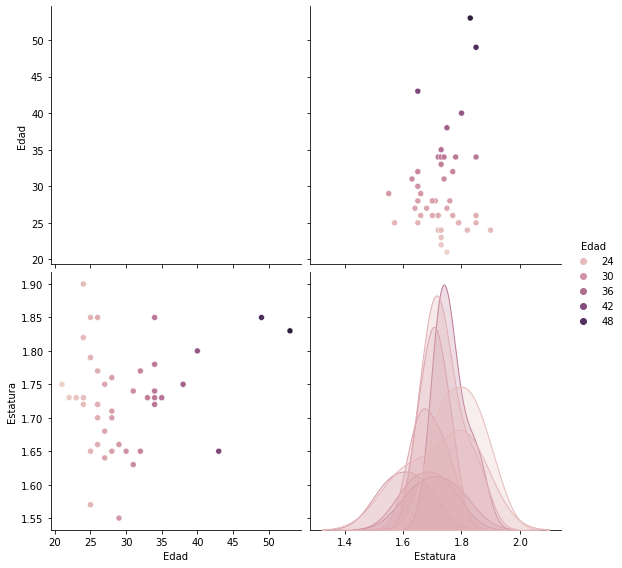

In [9]:
sb.pairplot(df.dropna(), hue='Edad',size=4,vars=["Edad","Estatura"],kind='scatter')

Se observa que es posible establecer identificar la data por grupos.  Los colores permiten hacerse una idea de como el clustering puede ser aplicado.

### **K-means algorithm**
K-Means es un algoritmo no supervisado de Clustering. Se utiliza cuando tenemos un montón de datos sin etiquetar. El objetivo de este algoritmo es el de encontrar “K” grupos (clusters) entre los datos. \\
*Nota importante:* \\
El algoritmo converge a un resultado que puede ser el óptimo local, por lo que será conveniente volver a ejecutar más de una vez con puntos iniciales aleatorios para confirmar si hay una salida mejor. 

In [62]:
class KMeans:
    def __init__(self,dataset,k,verbose=True):
        self.dataset = dataset
        self.k = k
        self.centroids = self.__getCentroids()
        self.clusters = np.zeros((dataset.shape[0],1))
        self.cost = 0
        self.verbose = verbose
        
    def __getCentroids(self):
        centroids = None
        for i in range(self.dataset.shape[1]):
            column = np.random.uniform(np.min(self.dataset[:,i]), np.max(self.dataset[:,i]), self.k).reshape(-1,1)
            centroids = column if centroids is None else np.hstack((centroids,column))
        return centroids
    
    def __euclideanDistance(self, dataset, centroid):
        distance = np.sqrt(np.sum(np.subtract(dataset,centroid)**2,axis=1)).reshape(-1,1)
        return distance
            
    def __getDistances(self, dataset):
        distances = None
        for i in range(self.k):
            distance = self.__euclideanDistance(dataset,self.centroids[i])
            distances = distance if distances is None else np.hstack((distances,distance))
        return distances
    
    def __updateCentroids(self):
        for i in range(self.k):
            indices = np.where(self.clusters == i)
            if (indices[0].size):
                self.centroids[i] = np.mean(self.dataset[indices],axis=0)
    
    def fit(self):
        previous_centroids = np.zeros_like(self.centroids)
        while not np.array_equal(self.centroids,previous_centroids):
            distances = self.__getDistances(self.dataset)
            self.clusters = np.argmin(distances,axis=1)
            self.cost = np.mean(np.min(distances,axis=1))
            previous_centroids = self.centroids.copy()
            if self.verbose:
                print("Costo: "+str(self.cost))
                print("Actualizando centroides:")
                print(self.centroids)
                print()
            self.__updateCentroids()
            
    def predict(self, dataset):
        distances = self.__getDistances(dataset)
        clusters = np.argmin(distances,axis=1)
        return clusters

### **Training**

In [66]:
training = df[["Estatura","Edad"]].to_numpy(dtype="float64")

kmeans = KMeans(training,3)
kmeans.fit()
clusters = kmeans.predict(dataset_train)


Costo: 3.126120228724719
Actualizando centroides:
[[ 1.56226679 37.86315422]
 [ 1.59768012 39.04151798]
 [ 1.56993    24.26896615]]

Costo: 1.8799909831014587
Actualizando centroides:
[[ 1.745   34.     ]
 [ 1.7825  46.25   ]
 [ 1.7225  26.03125]]

Costo: 1.8316915634050326
Actualizando centroides:
[[ 1.74       34.        ]
 [ 1.77666667 48.33333333]
 [ 1.725      25.7       ]]

Costo: 1.8439771266103477
Actualizando centroides:
[[ 1.73357143 33.71428571]
 [ 1.77666667 48.33333333]
 [ 1.72758621 25.55172414]]



### **Plotting results**
Se presentan en asteriscos rojos los centroides.

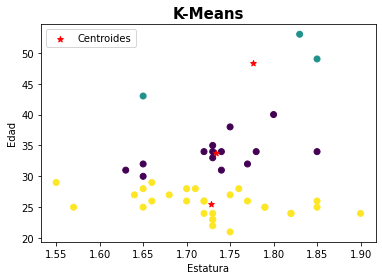

In [71]:
plt.scatter(df["Estatura"],df["Edad"],c=clusters)
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1], marker='*', c='red', label="Centroides")
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("K-Means", fontdict=font)
plt.legend()
plt.show()

### **Gaussian Mixture Model**

In [78]:
gmm = GaussianMixture(3)
gmm.fit(training)
gmm.predict(training)
clusters_gmm = gmm.predict(training)

### **Plotting Results**

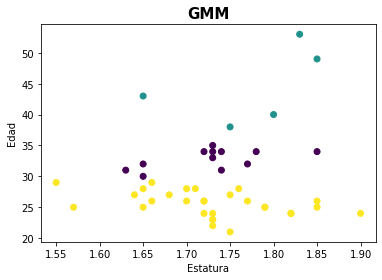

In [79]:
plt.scatter(df["Estatura"],df["Edad"],c=clusters_gmm)
plt.xlabel("Estatura")
plt.ylabel("Edad")
plt.title("GMM", fontdict=font)
plt.show()

### **Encontrar K**

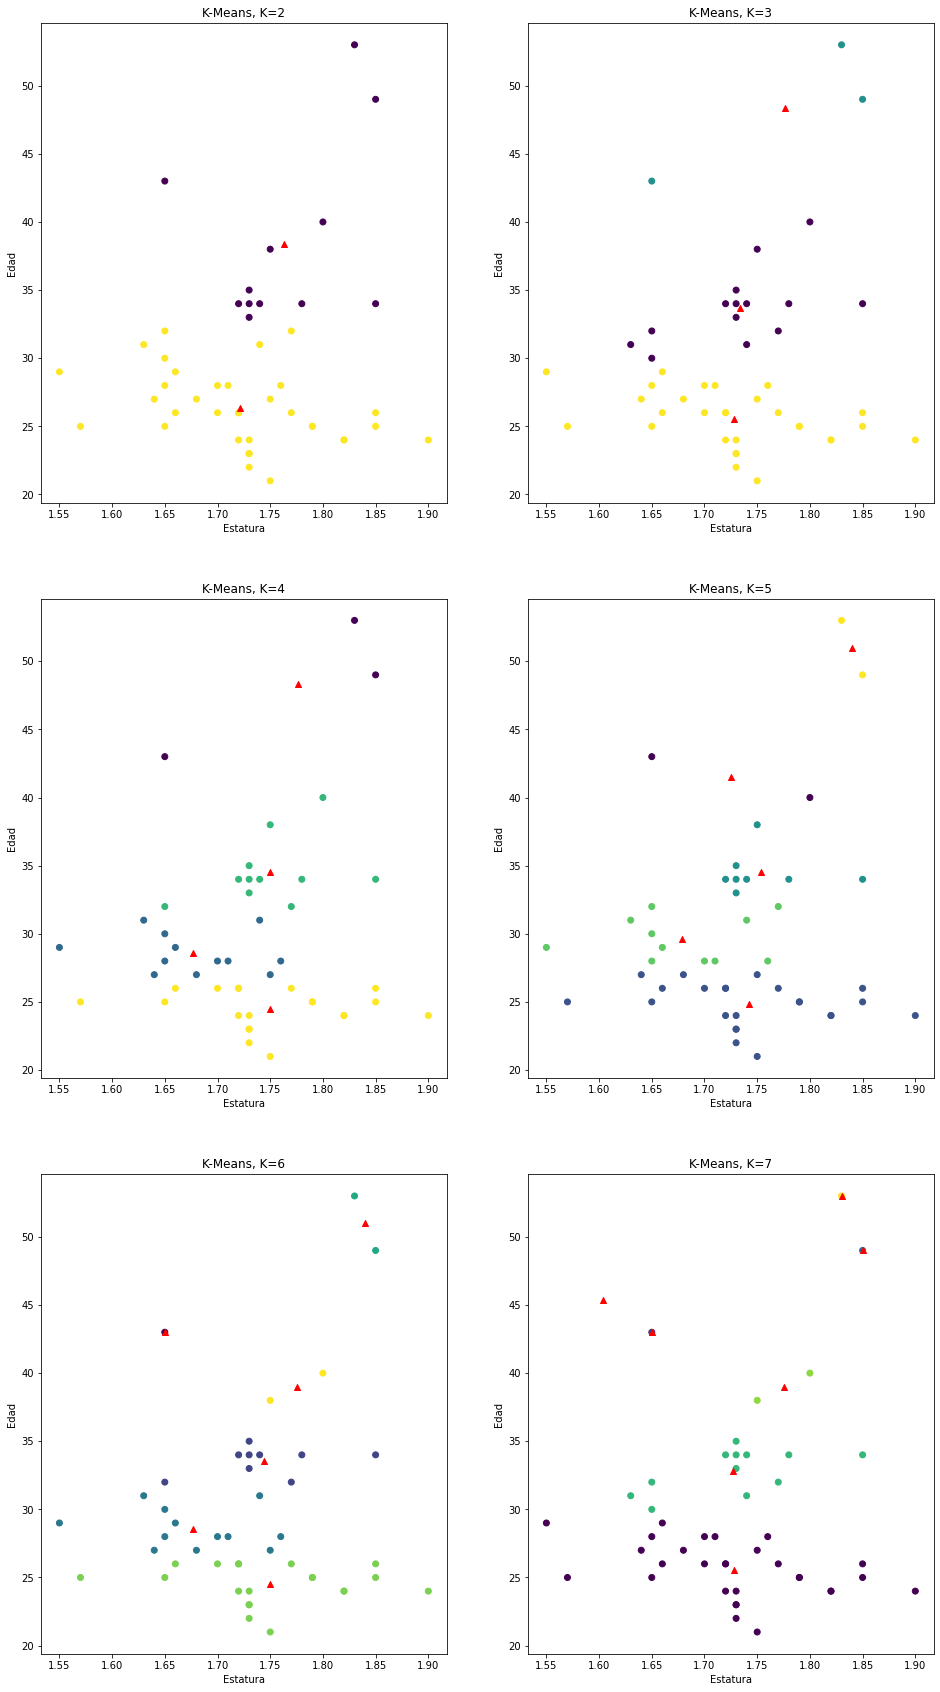

In [86]:
kmeans_costs = list()
f,axes = plt.subplots(5,2,sharex=False, figsize=(16,30))
plot_number = 0
for k in range(2,8):
    kmeans = KMeans(dataset_train,k,False)
    kmeans.fit()
    clusters = kmeans.predict(dataset_train)
    kmeans_costs.append(kmeans.cost)
    
    plot_number += 1
    plt.subplot(3,2, plot_number)
    plt.scatter(df["Estatura"],df["Edad"],c=clusters)
    plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1], marker='^', c='red', label="Centroides")
    plt.xlabel("Estatura")
    plt.ylabel("Edad")
    plt.title("K-Means, K="+str(k))
            
plt.show()

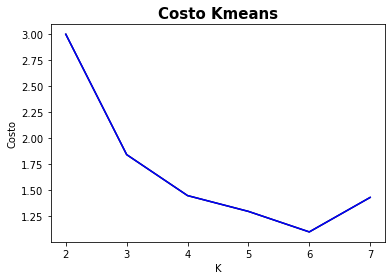

In [91]:


plt.plot(range(2,8), kmeans_costs, 'k' , range(2,8), kmeans_costs,'blue' )
plt.xlabel("K")
plt.ylabel("Costo")
plt.title("Costo Kmeans", fontdict=font)
plt.show()

